In [1]:
#Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm 

from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error, make_scorer



In [2]:
#read csv file
df = pd.read_csv('./SolarPrediction.csv')

In [3]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [4]:
df['year'] = pd.to_datetime(df['Data']).dt.year
df['month'] = pd.to_datetime(df['Data']).dt.month
df['day'] = pd.to_datetime(df['Data']).dt.day

In [5]:
df['hour'] = pd.to_datetime(df['Time']).dt.hour
df['minute'] = pd.to_datetime(df['Time']).dt.minute
df['second'] = pd.to_datetime(df['Time']).dt.second

In [6]:
df['rise_hr'] = pd.to_datetime(df['TimeSunRise']).dt.hour
df['rise_min'] = pd.to_datetime(df['TimeSunRise']).dt.minute
df['set_hr'] = pd.to_datetime(df['TimeSunSet']).dt.hour
df['set_min'] = pd.to_datetime(df['TimeSunSet']).dt.minute

In [7]:
# # replacing blank strings with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [35]:
df = df.drop_duplicates()
df = df.dropna(how='any',axis=0)

In [8]:
df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,...,year,month,day,hour,minute,second,rise_hr,rise_min,set_hr,set_min
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,...,2016,9,29,23,55,26,6,13,18,13
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,...,2016,9,29,23,50,23,6,13,18,13
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,...,2016,9,29,23,45,26,6,13,18,13
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,...,2016,9,29,23,40,21,6,13,18,13
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,...,2016,9,29,23,35,24,6,13,18,13


In [9]:
df.columns

Index(['UNIXTime', 'Data', 'Time', 'Radiation', 'Temperature', 'Pressure',
       'Humidity', 'WindDirection(Degrees)', 'Speed', 'TimeSunRise',
       'TimeSunSet', 'year', 'month', 'day', 'hour', 'minute', 'second',
       'rise_hr', 'rise_min', 'set_hr', 'set_min'],
      dtype='object')

In [11]:
df.isnull().sum()

UNIXTime                  0
Data                      0
Time                      0
Radiation                 0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
year                      0
month                     0
day                       0
hour                      0
minute                    0
second                    0
rise_hr                   0
rise_min                  0
set_hr                    0
set_min                   0
dtype: int64

In [12]:
df = df.drop(columns=['UNIXTime', 'Data', 'Time','year','TimeSunRise',
       'TimeSunSet','rise_hr','second'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32686 entries, 0 to 32685
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Radiation               32686 non-null  float64
 1   Temperature             32686 non-null  int64  
 2   Pressure                32686 non-null  float64
 3   Humidity                32686 non-null  int64  
 4   WindDirection(Degrees)  32686 non-null  float64
 5   Speed                   32686 non-null  float64
 6   month                   32686 non-null  int64  
 7   day                     32686 non-null  int64  
 8   hour                    32686 non-null  int64  
 9   minute                  32686 non-null  int64  
 10  rise_min                32686 non-null  int64  
 11  set_hr                  32686 non-null  int64  
 12  set_min                 32686 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 3.5 MB


<AxesSubplot:>

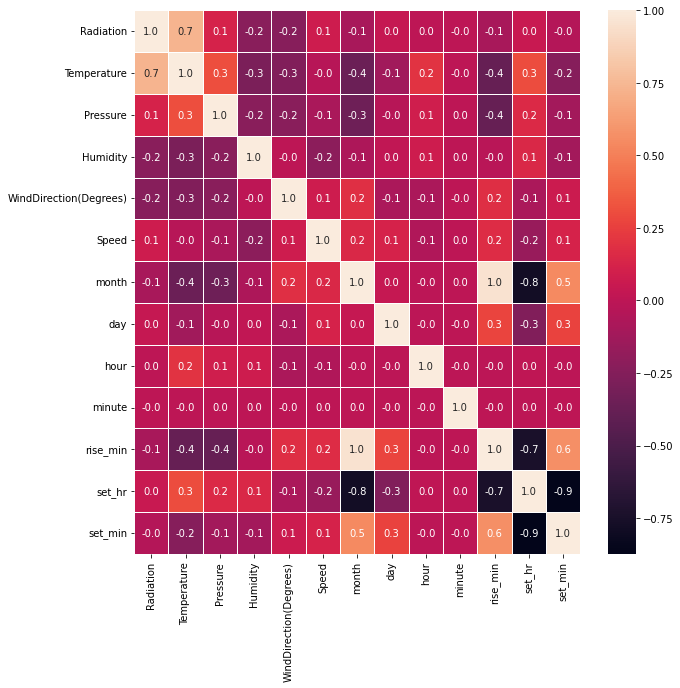

In [14]:
a,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [15]:
df_final = df.drop(columns = ["rise_min","set_hr"])

In [16]:
df_final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Radiation,32686.0,207.124697,315.916387,1.11,1.2300,2.66,354.235,1601.26
Temperature,32686.0,51.103255,6.201157,34.00,46.0000,50.00,55.000,71.00
Pressure,32686.0,30.422879,0.054673,30.19,30.4000,30.43,30.460,30.56
Humidity,32686.0,75.016307,25.990219,8.00,56.0000,85.00,97.000,103.00
WindDirection(Degrees),32686.0,143.489821,83.167500,0.09,82.2275,147.70,179.310,359.95
Speed,32686.0,6.243869,3.490474,0.00,3.3700,5.62,7.870,40.50
month,32686.0,10.526066,1.096691,9.00,10.0000,11.00,11.000,12.00
day,32686.0,15.825766,8.711824,1.00,9.0000,16.00,23.000,31.00
hour,32686.0,11.557425,6.912034,0.00,6.0000,12.00,18.000,23.00
minute,32686.0,27.556691,17.268507,0.00,15.0000,30.00,45.000,57.00


In [17]:
#scaler = MinMaxScaler()
scaler = MinMaxScaler()

df_final.iloc[:,:] = scaler.fit_transform(df_final.iloc[:,:])

In [18]:
df_final.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,minute,set_min
0,0.000062,0.378378,0.72973,0.536842,0.492692,0.138765,0.0,0.933333,1.0,0.964912,0.220339
1,0.000062,0.378378,0.72973,0.526316,0.490996,0.083210,0.0,0.933333,1.0,0.877193,0.220339
2,0.000075,0.378378,0.72973,0.515789,0.440894,0.083210,0.0,0.933333,1.0,0.789474,0.220339
3,0.000062,0.378378,0.72973,0.547368,0.382426,0.083210,0.0,0.933333,1.0,0.701754,0.220339
4,0.000037,0.378378,0.72973,0.568421,0.291391,0.138765,0.0,0.933333,1.0,0.614035,0.220339


In [19]:
X = df_final.loc[:, df_final.columns != 'Radiation']
y = df_final.loc[:, df_final.columns == 'Radiation']

In [20]:
X.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,month,day,hour,minute,set_min
0,0.378378,0.72973,0.536842,0.492692,0.138765,0.0,0.933333,1.0,0.964912,0.220339
1,0.378378,0.72973,0.526316,0.490996,0.083210,0.0,0.933333,1.0,0.877193,0.220339
2,0.378378,0.72973,0.515789,0.440894,0.083210,0.0,0.933333,1.0,0.789474,0.220339
3,0.378378,0.72973,0.547368,0.382426,0.083210,0.0,0.933333,1.0,0.701754,0.220339
4,0.378378,0.72973,0.568421,0.291391,0.138765,0.0,0.933333,1.0,0.614035,0.220339


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
# Running the linear model 
lm = sm.OLS(y_train,X_train).fit()

In [23]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:              Radiation   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              6443.
Date:                Sun, 08 May 2022   Prob (F-statistic):                        0.00
Time:                        20:15:18   Log-Likelihood:                          16991.
No. Observations:               26148   AIC:                                 -3.396e+04
Df Residuals:                   26138   BIC:                                 -3.388e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [24]:
X=X.drop(columns=["set_min","Speed"])

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
# Running the linear model 
lm = sm.OLS(y_train,X_train).fit()

In [27]:
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:              Radiation   R-squared (uncentered):                   0.711
Model:                            OLS   Adj. R-squared (uncentered):              0.711
Method:                 Least Squares   F-statistic:                              8054.
Date:                Sun, 08 May 2022   Prob (F-statistic):                        0.00
Time:                        20:15:18   Log-Likelihood:                          16990.
No. Observations:               26148   AIC:                                 -3.396e+04
Df Residuals:                   26140   BIC:                                 -3.390e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [29]:
y_predictions = lin_reg.predict(X_test)
lin_mse = mean_squared_error(y_test, y_predictions)
lin_rmse = np.sqrt(lin_mse)
print("Mean Squared Error = ",lin_mse)
print("Root Mean Squared Error = ",lin_rmse)

Mean Squared Error =  0.014714517643986475
Root Mean Squared Error =  0.12130341151009098


D:\New folder\envs\rstudio-\lib\site-packages\numpy\core\shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


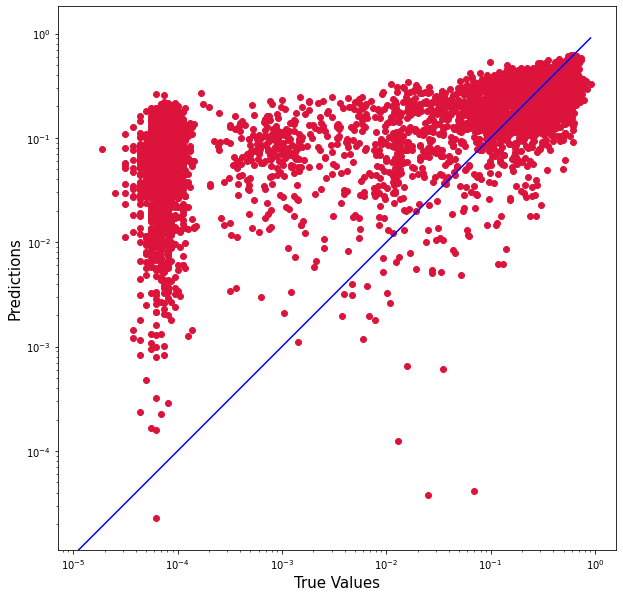

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predictions), max(y_test['Radiation']))
p2 = min(min(y_predictions), min(y_test['Radiation']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

In [32]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

C:\Users\florp\AppData\Local\Temp\ipykernel_15060\71352386.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_reg.fit(X_train, y_train)


RandomForestRegressor()

In [33]:
y_predictions = forest_reg.predict(X_test)
forest_mse = mean_squared_error(y_test, y_predictions)
forest_rmse = np.sqrt(forest_mse)
print("Mean Squared Error = ",forest_mse)
print("Root Mean Squared Error = ",forest_rmse)

Mean Squared Error =  0.0025056653951757773
Root Mean Squared Error =  0.05005662189137195


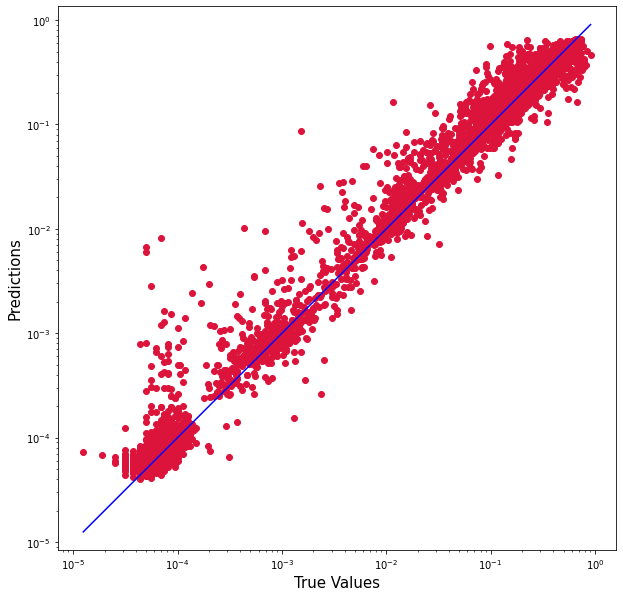

In [34]:
plt.figure(figsize=(10,10))
plt.scatter(y_test, y_predictions, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_predictions), max(y_test['Radiation']))
p2 = min(min(y_predictions), min(y_test['Radiation']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()